# Assignment 4

Approximate time needed: 6-7 hours
    
## DLT and Epipolar Lines

The goal of this assignment is to aid your understanding of the Direct Linear Transform as well as Epipolar geometry.

For the first part of the assignment you will find correspondences between 2D-3D points and estimate the P Matrix. You will then be required to estimate Camera Parameters from this P matrix.

The second part of this assignment will require you to construct epipolar lines on two corresponding images.

The third part of this assignment will require you to use camera intrinsics to estimate the bounding box of a car.

---
### 4.1 Generating Correspondences
The first step to perform DLT is to generate correspondences. The cell below opens a new window. Clicking anywhere on the image should give you the pixel location of the image. Once you're done clicking, close the image window. The cell after displays the points you have clicked.

In [ ]:
%matplotlib tk
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import numpy as np


image_points = []
fig = plt.figure(figsize=(20,30))

img = mpimg.imread('q1/dlt1.jpeg')

def onclick(event):
    ix, iy = event.xdata, event.ydata
    image_points.append([ix, iy])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

imgplot = plt.imshow(img)
plt.show()

In [ ]:
%matplotlib inline
N = len(image_points)
image_points = np.array(image_points)
fig = plt.figure(figsize=(10,15))

img=mpimg.imread('q1/dlt1.jpeg')
imgplot = plt.imshow(img)

colors = np.random.rand(N)
area = (15 * np.ones(N))**2 

plt.scatter(image_points[:,0], image_points[:,1], c=colors, s=area)
plt.show()

After generating pixel locations, you have to generate the corresponding world points. You have the freedom to chose which point you want as origin. You can consider each side as 4 units.

Ensure that the ordering of your points matches the ordering of image points. Keep track of the sequence of corners clicked.

Now that we have the correspondences, we can estimate the P matrix. Implement the DLT function that returns the P matrix

Quick recap: x_i = P * X_i where (x_i, X_i) is the ith correspondence, and P is a 3x4 dimensional matrix. P is further decomposed as P = K * [ R | T].


### Theory

- Explain how DLT is implemented and show why it works (proof)
- When does DLT fail?

## Analysing P

The next part of this question is to analyse how good our estimate is. Report the reprojection error of your P matrix

In [ ]:
#Get reprojected points
def get_points(P, X):
    pass

#Get reprojection error
def get_err(x, X, P):
    pass

In [ ]:
print("Reprojection Error is:", get_err(x, X, P))

Given the P matrix, we can estimate K, R and T. Write a function that returns K,R,T given P.
Note: 
P = K * [R | T] where K is a 3x3 matrix and [R | T], P are 3x4 matrices

In [ ]:
def ret_RKT(P):
    pass

R, K, T = ret_RKT(P)

#### Verifying the R, K, T Values

Use `np.isclose` to verify the matrix

**Reproject the world points with P matrix you have obtained via DLT and visualize**

### Zhangs method

For this task, use the inbuilt Opencv function to estimate the K matrix of a camera. Use the checkerboard images 5456-5470 in `q1/zhangs` folder for this task. Familiarize yourself with the different parameters for this method.

**Reference**: https://docs.opencv.org/3.4/dc/dbb/tutorial_py_calibration.html

---
### 4.2 Epipolar lines
#### Task 1

For this task, you have been given two images of the same scene taken from different view-points. You should first estimate the fundamental matrix from these two images.

<img src="./q2/img1.jpg" alt="image 1" width="400"/>
<img src="./q2/img2.jpg" alt="image 2" width="400"/>


Recall that given a point in one image, it's corresponding location in the other image can be found to along a line viz. the epipolar line. The task given to you is to draw the epipolar lines in the second image for each given point in the first image. You have to repeat this for the other image as well. Draw epipolar lines on the first image for the corresponding points in the second image.

The convention used for F is $x'^{T}Fx$ where $x'$ is the location of the point in the second image. For this question you will need to compute the F matrix on your own without using inbuilt functions. 

In [1]:
%matplotlib tk
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import numpy as np


p1 = []
fig = plt.figure(figsize=(20,30))

img = mpimg.imread('q2/img1.jpg')

def onclick(event):
    ix, iy = event.xdata, event.ydata
    p1.append([ix, iy])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

imgplot = plt.imshow(img)
plt.show()

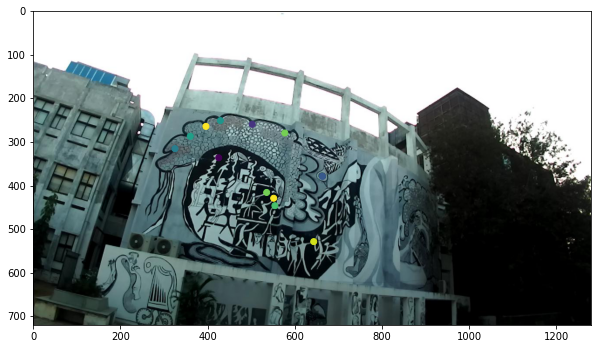

In [2]:
%matplotlib inline
N = len(p1)
p1 = np.array(p1)
fig = plt.figure(figsize=(10,15))

img1 = mpimg.imread('q2/img1.jpg')
imgplot = plt.imshow(img1)

colors = np.random.rand(N)

plt.scatter(p1[:,0], p1[:,1], c=colors)
plt.show()

In [4]:
%matplotlib tk
p2 = []
fig = plt.figure(figsize=(20,30))

img = mpimg.imread('q2/img2.jpg')

def onclick(event):
    ix, iy = event.xdata, event.ydata
    p2.append([ix, iy])

cid = fig.canvas.mpl_connect('button_press_event', onclick)

imgplot = plt.imshow(img)
plt.show()

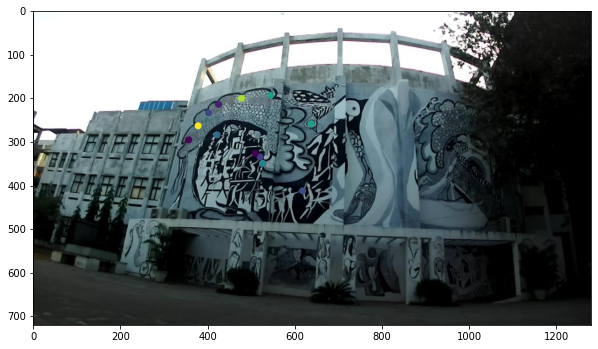

In [5]:
%matplotlib inline
N = len(p2)
p2 = np.array(p2)
fig = plt.figure(figsize=(10,15))

img2 = mpimg.imread('q2/img2.jpg')
imgplot = plt.imshow(img2)

colors = np.random.rand(N)

plt.scatter(p2[:,0], p2[:,1], c=colors)
plt.show()


In [6]:
def Fcalc(p1,p2):
    W = np.zeros((p1.shape[1],9))
    #getting W
    for i in range(p1.shape[1]):
        u,v,u2,v2 = p1[0,i],p1[1,i],p2[0,i],p2[1,i]
        W[i] = np.array([u*u2, u*v2, u,v*u2,v*v2,v,u2,v2,1])
    #getting Fhat
    U,D,Vt = np.linalg.svd(W)
    Fhat = Vt.T[:,-1].reshape(3,3)
    #getting F
    U,D,Vt = np.linalg.svd(Fhat)
    D[-1] = 0
    F = U@np.diag(D)@Vt
    return F

In [8]:
x1 = np.vstack((p1.T,np.ones(len(p1))))
x2 = np.vstack((p2.T,np.ones(len(p2))))

# normalization.
m1 = np.mean(x1, axis=1)
s1 = np.sqrt(2)/np.std(x1[:2])
m2 = np.mean(x2, axis=1)
s2 = np.sqrt(2)/np.std(x2[:2])

T1 = np.array([[s1, 0, -s1*m1[0]],
                [0, s1, -s1*m1[1]],
                [0, 0, 1]])
T2 = np.array([[s2, 0, -s2*m2[0]],
                [0, s2, -s2*m2[1]],
                [0, 0, 1]])
x1 = T1@x1
x2 = T2@x2

#calculation of F using normalised data
F = Fcalc(x1, x2)

# denormalize.
F = T1.T @ F @ T2

#since our convention is x2.T @ F @ x1 and not x1.T @ F @ x2 we transpose F
F = F.T

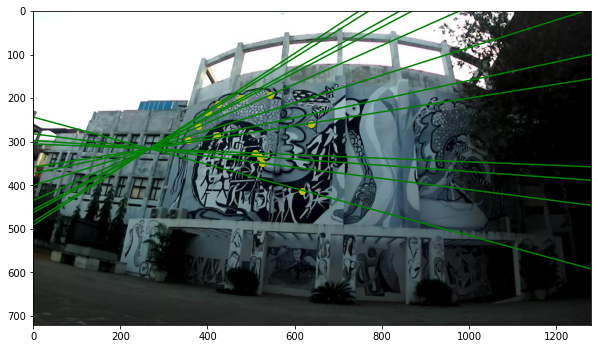

In [9]:
#epipolar lines
x1 = np.vstack((p1.T,np.ones(len(p1))))
x2 = np.vstack((p2.T,np.ones(len(p2))))

l1 = F.T@x2
l2 = F@x1

#plotting image-1 with epipolar lines and epipoles
fig = plt.figure(figsize=(10,15))

img2 = mpimg.imread('q2/img2.jpg')
imgplot = plt.imshow(img2)

plt.xlim([0, 1280])
plt.ylim([720,0])

for i in range(l2.shape[1]):
    x = np.array([0, 1280])
    y = -(l2[0,i]*x + l2[2,i])/l2[1,i]
    plt.plot(x, y, '-g')


plt.scatter(p2[:,0], p2[:,1], c='y')
plt.show()

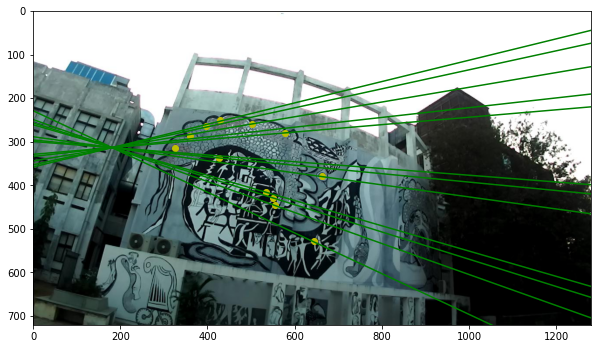

In [10]:
#plotting image-2 with epipolar lines and epipoles
fig = plt.figure(figsize=(10,15))

img1 = mpimg.imread('q2/img1.jpg')
imgplot = plt.imshow(img1)

plt.xlim([0, 1280])
plt.ylim([720,0])

for i in range(l1.shape[1]):
    x = np.array([0, 1280])
    y = -(l1[0,i]*x + l1[2,i])/l1[1,i]
    plt.plot(x, y, '-g')


plt.scatter(p1[:,0], p1[:,1], c='y')
plt.show()

For finding the fundamental matrix F, we use the normalised 8-point algorithm on selected points

First we normalise the data to be origin centered and scale it so that the average distance of pixel from origin is $\sqrt{2}$

Hence the transform to be applied is given by 
$
T = \begin{bmatrix}
s & 0 & -s*t_x \\
0 & s & -s*t_y \\
0 & 0 & 0 \\
\end{bmatrix}$
Where $s = \dfrac{\sqrt{2}}{\text{std of pixels}}$ and $t_x,t_y$ are the mean values of the pixels

We apply the transforms $T_1,T_2$ respectively for the pixels in image-1 and image-2.

Now we find the matrix $W$ where each row of the matrix is given by $W_i = \begin{bmatrix}
u_1^i*u_2^i & u_1^i*v_2^i & u_1^i & v_1^i*u_2^i & v_1^i*v_2^i & v_1^i & u_2^i & v_2^i & 1 
\end{bmatrix}$ where $u_j^i,v_j^i$ are the x and y coordinates of image-j and pixel i

Our fundamental matrix can be obtained from W using SVD. 

$U*D*V^T = \text{SVD}(W)$ then $f = \text{last column of V}$

from $f$ we can obtain F since $f$ is just the elements of F stacked onto each other to form a column matrix. We can get F by reshaping $f$ into a 3x3 matrix.

To satisfy the condition of F being singular we do SVD on F

$U*D*V^T = \text{SVD}(F)$ then setting the final element of the diagonal matrix $D$ as zero and recomputing F, we can get the closest fundamental matrix to F that is singular.

$F^{\text{recomp}} = F = U*D^{\text{modified}}*V^T$

The above calculated F satisfies $x_1^TFx_2 = 0$ but the question requires it to be $x_2^TFx_1 = 0$. Taking the transpose of the equation we get the final F is the tranpose of currently calculated F. $(x_1^TFx_2)^T = x_2^TF^Tx_1 = 0 ==> F^\text{final} = F^T$

Now the epipolar lines can be calculated as $l_1 = F^Tx_2$, $l_2 = Fx_1$ where F is the fundamental matrix that we have found, $x_1,x_2$ are the pixel correspondences in the images

line equation is given by $l^Tx = 0$, ie. 
$
\begin{bmatrix}
l_1 & l_2 & l_3
\end{bmatrix} * 
\begin{bmatrix}
x  \\
y  \\
1  \\
\end{bmatrix} = 0$

Hence we get the equation $y = \dfrac{-l_1x-l_3}{l_2}$. we use this to plot the epipolar lines for each column of $l_1,l_2$ which corresponds to each epipolar lines.

**Provide a clear explanation on your approach for both this task and the next**

#### Task 2
Report the location of the epipoles. Mathematically find the epipoles and verify that the lines intersect at the epipole.

We know that epipole of image-1 will follow $F*e_1 = 0$. Hence $e_1$ lie in the right nullspace of F. 

$U*D*V^T = \text{SVD}(F)$

We know that columns of V form an orthonormal basis for the row space of F. Since F is rank deficient, the final singular value in the diagonal matrix D is zero. Hence the nullspace will contain the last column of V. Therefore the epipole $e_1$ will be the last column of V. We convert it back to euclidean space by dividing $e_1$ by the value in its last row to get the epipole in image-1

Similarly we know that $F^T*e_2 = 0$

$U*D*V^T = \text{SVD}(F^T)$

By the same reasoning as before the epipole $e_2$ will be the last column of V. We convert it back to euclidean space by dividing $e_2$ by the value in its last row to get the epipole in image-2

In [11]:
#epipoles
(U, S, Vt) = np.linalg.svd(F)
e1 = Vt.T[:, -1]
e1 = e1/e1[2]

(U, S, Vt) = np.linalg.svd(F.T)
e2 = Vt.T[:,-1]
e2 = e2/e2[2]

print(f'location of epipole in image 1 is ({e1[0]},{e1[1]})')
print(f'location of epipole in image 2 is ({e2[0]},{e2[1]})')


location of epipole in image 1 is (181.24657602581328,313.5543634953022)
location of epipole in image 2 is (267.1611987255115,316.08792259171224)


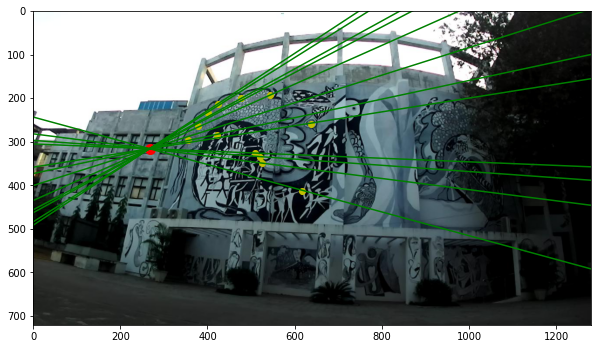

In [12]:
#epipolar lines
x1 = np.vstack((p1.T,np.ones(len(p1))))
x2 = np.vstack((p2.T,np.ones(len(p2))))

l1 = F.T@x2
l2 = F@x1

#plotting image-1 with epipolar lines and epipoles
fig = plt.figure(figsize=(10,15))

img2 = mpimg.imread('q2/img2.jpg')
imgplot = plt.imshow(img2)

plt.xlim([0, 1280])
plt.ylim([720,0])

for i in range(l2.shape[1]):
    x = np.array([0, 1280])
    y = -(l2[0,i]*x + l2[2,i])/l2[1,i]
    plt.plot(x, y, '-g')


plt.scatter(p2[:,0], p2[:,1], c='y')
plt.scatter(e2[0],e2[1], c='r',s=100)
plt.show()

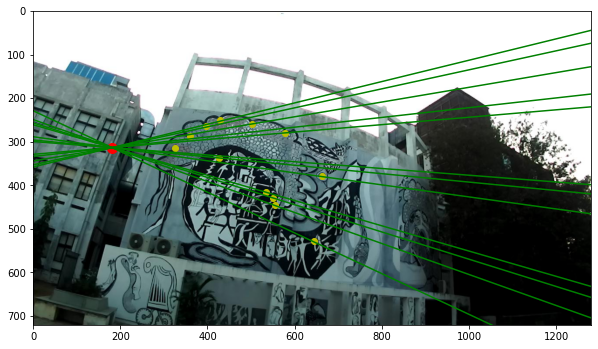

In [13]:
#plotting image-2 with epipolar lines and epipoles
fig = plt.figure(figsize=(10,15))

img1 = mpimg.imread('q2/img1.jpg')
imgplot = plt.imshow(img1)

plt.xlim([0, 1280])
plt.ylim([720,0])

for i in range(l1.shape[1]):
    x = np.array([0, 1280])
    y = -(l1[0,i]*x + l1[2,i])/l1[1,i]
    plt.plot(x, y, '-g')


plt.scatter(p1[:,0], p1[:,1], c='y')
plt.scatter(e1[0],e1[1], c='r',s=100)
plt.show()

____
### 4.3 Drawing a bounding box around a car and localizing it in the camera frame
You’ve been provided with an image, also taken from a self-driving car, that shows another car in front. The camera has been placed on top of the car, 1.65 m from the ground, and assume the image plane is perfectly perpendicular to the ground. K is provided to you. Your task is to draw a 3D-bounding box around the car in front as shown. Your approach should be to place eight points in the 3D world such that they surround all the corners of the car, then project them onto the image, and connect the projected image points using lines. You might have to apply a small 5° rotation about the vertical axis to align the box perfectly. Rough dimensions of the car - h: 1.38 m, w: 1.51, l: 4.10. (Hint: Fix a point on the ground as your world origin.). Also estimate the approximate translation vector to the mid-point of the two rear wheels of the car in the camera frame.

![Kitti car](./q3/image.png)